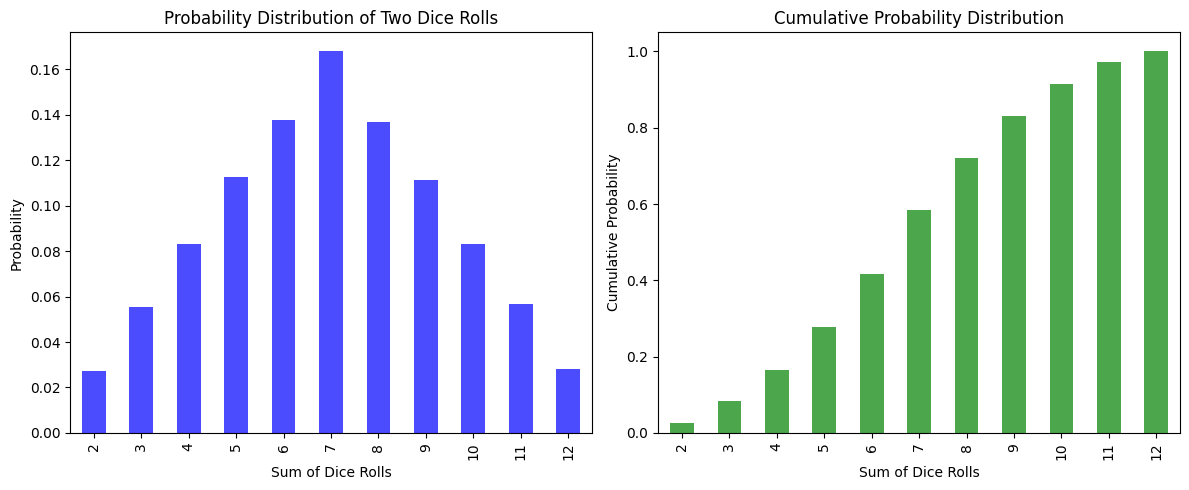

In [56]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# Generate sum of two dice rolls 100,000 times
L = [random.randint(1, 6) + random.randint(1, 6) for _ in range(100000)]

# Compute probabilities
s = (pd.Series(L).value_counts() / len(L)).sort_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot probability distribution
s.plot(kind='bar', ax=axes[0], color='blue', alpha=0.7)
axes[0].set_title("Probability Distribution of Two Dice Rolls")
axes[0].set_xlabel("Sum of Dice Rolls")
axes[0].set_ylabel("Probability")

# Plot cumulative probability
np.cumsum(s).plot(kind='bar', ax=axes[1], color='green', alpha=0.7)
axes[1].set_title("Cumulative Probability Distribution")
axes[1].set_xlabel("Sum of Dice Rolls")
axes[1].set_ylabel("Cumulative Probability")

plt.tight_layout()
plt.show()

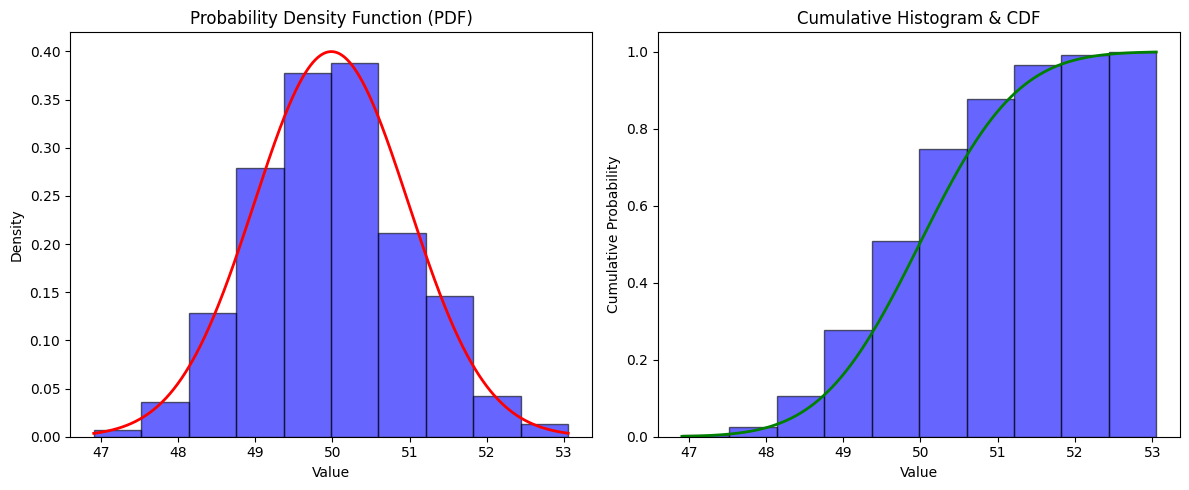

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal
from scipy.stats import norm

# Generate a sample from a normal distribution
sample = normal(loc=50, scale=1, size=1000)

# Calculate sample mean and standard deviation
sample_mean = sample.mean()
sample_std = sample.std()

# Define the normal distribution with estimated parameters
dist = norm(sample_mean, sample_std)

# Generate values for PDF and CDF
values = np.linspace(sample.min(), sample.max(), len(sample))
pdf_values = dist.pdf(values)  # Probability Density Function (PDF)
cdf_values = dist.cdf(values)  # Cumulative Distribution Function (CDF)

# Create subplots for PDF and CDF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram and PDF
axes[0].hist(sample, bins=10, density=True, alpha=0.6, color='blue', edgecolor='black')
axes[0].plot(values, pdf_values, color='red', lw=2)
axes[0].set_title("Probability Density Function (PDF)")
axes[0].set_xlabel("Value")
axes[0].set_ylabel("Density")

# Plot CDF with cumulative histogram
axes[1].hist(sample, bins=10, density=True, cumulative=True, alpha=0.6, color='blue', edgecolor='black')
axes[1].plot(values, cdf_values, color='green', lw=2)
axes[1].set_title("Cumulative Histogram & CDF")
axes[1].set_xlabel("Value")
axes[1].set_ylabel("Cumulative Probability")

plt.tight_layout()
plt.show()

(array([ 4.,  3.,  3., 11.,  6.,  5., 12., 22., 20., 16., 25., 23., 32.,
        30., 22., 22., 15.,  9.,  6.,  7., 13.,  8.,  7., 16., 15., 23.,
        34., 44., 49., 54., 63., 60., 58., 56., 42., 29., 28., 31., 22.,
        17., 11., 11.,  6.,  4.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([ 8.51558393,  9.50569777, 10.49581161, 11.48592545, 12.47603929,
        13.46615313, 14.45626698, 15.44638082, 16.43649466, 17.4266085 ,
        18.41672234, 19.40683618, 20.39695002, 21.38706386, 22.3771777 ,
        23.36729154, 24.35740538, 25.34751922, 26.33763306, 27.3277469 ,
        28.31786074, 29.30797458, 30.29808842, 31.28820226, 32.2783161 ,
        33.26842994, 34.25854378, 35.24865762, 36.23877146, 37.2288853 ,
        38.21899914, 39.20911298, 40.19922682, 41.18934066, 42.1794545 ,
        43.16956834, 44.15968218, 45.14979602, 46.13990987, 47.13002371,
        48.12013755, 49.11025139, 50.10036523, 51.09047907, 52.08059291,
        53.07070675, 54.06082059, 55.05093443, 56.04104827,

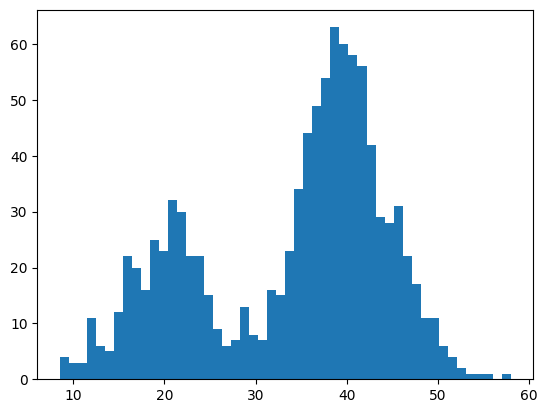

In [58]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))
# plot histogram bins=50
plt.hist(sample,bins=50)

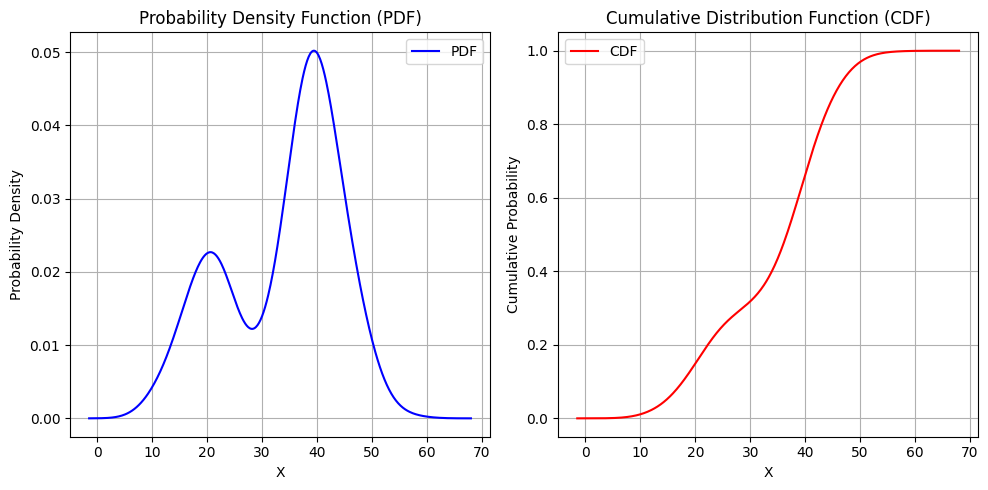

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range for the x-axis with enough points for a smooth curve
x_values = np.linspace(min(sample) - 10, max(sample) + 10, 500)

# Initialize an array to store the summed PDF
total_distribution = np.zeros_like(x_values)

# Generate and sum Gaussian distributions
for x in sample:
    total_distribution += norm.pdf(x_values, loc=x, scale=3)

# Normalize the PDF so that it integrates to 1
total_distribution /= np.trapz(total_distribution, x_values)

# Compute the CDF using cumulative trapezoidal integration
cdf = np.cumsum(total_distribution)  # Compute cumulative sum
cdf /= cdf[-1]  # Normalize so that CDF ends at 1

# Plot both PDF and CDF
plt.figure(figsize=(10, 5))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x_values, total_distribution, label="PDF", color='b')
plt.xlabel("X")
plt.ylabel("Probability Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.grid()

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x_values, cdf, label="CDF", color='r')
plt.xlabel("X")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()